# Konvoliuciniai neuroniniai tinklai

- David H. Hubel ir Torsten Wiesel 1958 m. atliko keletą eksperimentų su katėmis, kurie suteikė esminių įžvalgų apie regos žievės struktūrą. 

- Jie parodė, kad daugelis regos žievės neuronų turi mažą vietinį receptorinį lauką, t. y. jie reaguoja tik į ribotoje regos lauko srityje esančius regimuosius dirgiklius.

- Be to, autoriai parodė, kad kai kurie neuronai reaguoja tik į horizontalių linijų vaizdus, o kiti - tik į skirtingų orientacijų linijas (du neuronai gali turėti tą patį recepcinį lauką, bet reaguoti į skirtingų orientacijų linijas).

- Jie taip pat pastebėjo, kad kai kurie neuronai turi didesnius recepcinius laukus ir reaguoja į sudėtingesnius raštus, kurie yra žemesnio lygio raštų deriniai. 

- Visa tai lėmė konvoliucinio neuroninio tinklo architektūros išradimą.

## Konvoliucijos ir koreliacijos operacijos

- Kryžminė koreliacija (angl. cross-correlation) yra dviejų sekų/funkcijų panašumo matas. Koreliacija kaip argumentus paima dvi funkcijas $f$ ir $g$, ir grąžina trečią, kuri, tam tikra prasme, parodo $f$ ir $g$ panašumo lygį.

- Dažniausiai viena funkcija imama kaip fiksuotas filtras, dar vadinamas branduoliu (angl. kernel).

- Diskrečioms vieno kintamojo funkcijoms kryžminės koreliacijos operacija apibrėžiama kaip:

$$
(f \star g)(m) = \sum_{n} f(n) \cdot g(m + n)
$$

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/convolution.gif" alt="correlation" width="65%">
<p><strong>1.12 pav., Koreliacijos operacija </strong></p>
</div>

- Šiek tiek painu: konvoliucija ir koreliacija yra labai panašios operacijos; konvoliucija yra koreliacija su filtru, pasuktu 180 laipsnių.

- Kadangi filtro svoriai nėra fiksuoti, nėra svarbu, ar atliekant operaciją filtrą apversime, ar ne, todėl skaičiavimų prasme, lengviau atlikti koreliacijos operaciją. 

- Taigi, konvoliuciniai neuroniniai tinklai iš tiesų naudoja kryžminę koreliaciją! 


### Koreliacijos operacija taikoma vaizdui

- Vaizdą galima apibrėžti kaip dviejų kintamųjų funkciją $I(x, y)$ – pikselio intensyvumo reikšmė koordinatėse $(x, y)$. Vieno kanalo atveju (nespalvotas vaizdas) $I$ įgyja reikšmes nuo 0 iki 255 (arba kitas normalizuotas diapazonas, pvz., [0, 1]).


- Koreliacija vaizdo apdorojime taikoma naudojant nedidelį filtrą (branduolį) $K$, kuris slysta per visas vaizdos vertes $ I(x, y) $. Kiekviename žingsnyje atliekama skaliarinė sandauga tarp filtro ir atitinkamos vaizdo dalies:

$$
(I \star K)(x, y) = \sum_{i=0}^{f_h-1} \sum_{j=0}^{f_w-1} I(x+i, y+j) \cdot K(i, j)
$$

  - Čia:
    - $ I(x+i, y+j) $ yra įvesties vaizdo reikšmė pozicijoje $ (x+i, y+j) $,
    - $ K(i, j) $ yra filtro (branduolio) reikšmė pozicijoje $ (i, j) $,
    - $ (I * K)(x, y) $ yra išvesties reikšmė pozicijoje $ (x, y) $.

### Koreliacijos operacijos pavyzdys

- Tarkime, turime 3x3 dydžio filtrą (branduolį) $ K $ ir 6x6 dydžio vaizdą $ I $:

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/conv_dotprod.png" alt="correlation dot product" width="65%">
<p><strong>1.12 pav., Skaliarinė sandauga tarp vaizdo dalies ir filtro  </strong></p>
</div>

- Koreliacijos operacija pradedama nuo kairiojo viršutinio kampo:

\begin{aligned}
(I \star K)(1, 1) &= (3 \times 1) + (1 \times 0) + (1 \times -1) + \cr
                  &\quad (1 \times 1) + (0 \times 0) + (7 \times -1) + \cr
                  &\quad (2 \times 1) + (3 \times 0) + (5 \times -1) = -7
\end{aligned}


- Šis skaičiavimas kartojamas kiekvienam pikseliui.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage import data
from skimage.transform import resize
import matplotlib.pyplot as plt

image = resize(data.camera(), (128, 128))

def show(img1, img2):
    fig, axs = plt.subplots(1, 2, figsize=(8, 16))
    axs[0].imshow(img1, cmap='gray', vmin=0, vmax=1)
    axs[1].imshow(img2, cmap='gray',  vmin=0, vmax=1)
    [ax.axis('off') for ax in axs]
    plt.show()

### Skirtingų filtrų pavyzdžiai

**Gauso filtras**: 

$$
G = \frac{1}{16}\begin{bmatrix} 1 & 2 & 1 \cr 2 & 4 & 2 \cr 1 & 2 & 1 \end{bmatrix}
$$

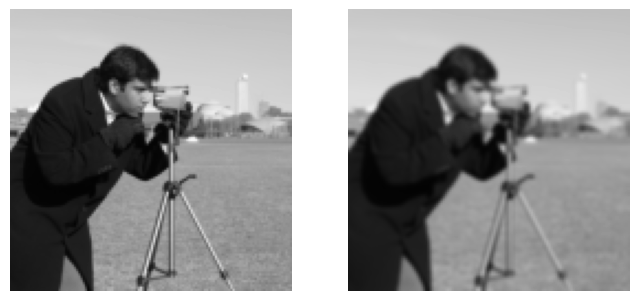

In [43]:
kernel = 1/16 * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

show(image, convolve(image, kernel))

- **Atvirkštinis Laplaso filtras**:

$$
L = \begin{bmatrix} 0 & -1 & 0 \cr -1 & 4 & -1 \cr 0 & -1 & 0 \end{bmatrix}
$$

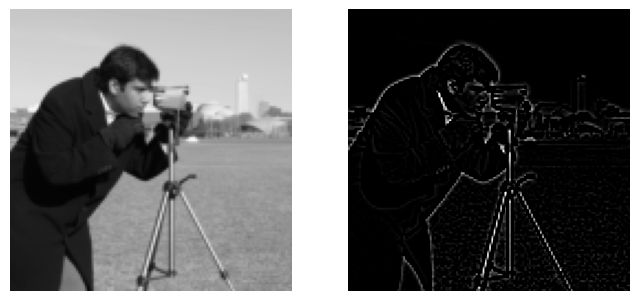

In [65]:
kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

show(image, convolve(image, kernel))

- **Sobelio filtrai**:
$$ 
S_x = \begin{bmatrix} -1 & 0 & 1 \cr -2 & 0 & 2 \cr -1 & 0 & 1 \end{bmatrix}, \quad
S_y = \begin{bmatrix} -1 & -2 & -1 \cr 0 & 0 & 0 \cr 1 & 2 & 1 \end{bmatrix}
$$

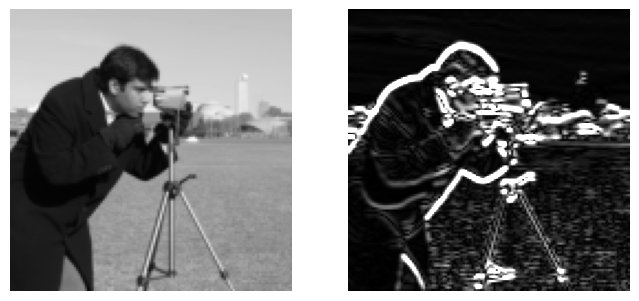

In [51]:
kernel_x = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

kernel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

show(image, np.sqrt(convolve(image, kernel_x)**2 + convolve(image, kernel_y)**2))


- Konvoliucinio neuroninio tinklo svoriai yra filtro (branduolio) koeficientų reikšmės. Filtrą savotiškai galime galima pavaizduoti kaip mažą receptorinio lauko dydžio paveikslėlį

- Skirtingus svorius naudojantys neuronai ignoruos viską savo recepciniame lauke, išskyrus tam tikras abstrakcijas (pvz., vertikalias linijas), nustatytas filtro svorių.

- Mokymo metu konvoliucinis neuroninis tinklas randa naudingiausius filtrus savo užduočiai atlikti ir išmoksta juos sujungti į sudėtingesnes jų kombinacijas.

## Konvoliucinis sluoksnis

- Svarbiausias struktūrinis blokas yra konvoliucinis sluoksnis – pirmojo konvoliucinio sluoksnio neuronai prijungiami ne prie kiekvieno įvesties vaizdo pikselio (kaip ankstesniuose skyriuose), o tik prie pikselių, esančių jų recepciniame lauke. 
- Savo ruožtu kiekvienas antrojo konvoliucinio sluoksnio neuronas yra sujungtas tik su neuronais, esančiais nedideliame stačiakampyje pirmajame sluoksnyje. 
- Tokia architektūra leidžia tinklui pirmajame paslėptajame sluoksnyje sutelkti dėmesį į žemo lygio požymius, tada kitame paslėptajame sluoksnyje juos surinkti į aukštesnio lygio požymius ir t.t. 
- Tokia hierarchinė struktūra būdinga vaizdo apdorojimui gyvūnų smegenyse.


<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/receptive_field.png" alt="receptive-field" width="65%">
<p><strong>1.12 pav., Konvoliucinių sluoksnių receptinis laukas </strong></p>
</div>

### Nulių pridėjimas (angl. zero-padding)

Tam tikro sluoksnio $i$ eilutėje, $j$ stulpelyje esantis neuronas yra sujungtas su ankstesnio sluoksnio neuronų, esančių nuo $i$ iki $i + f_h - 1$, nuo $j$ iki $j + f_w - 1$ eilutėse, išėjimais, kur $f_h$ ir $f_w$ yra recepcinio lauko aukštis ir plotis. Kad sluoksnis būtų tokio paties aukščio ir pločio kaip ankstesnis sluoksnis, aplink įvesties matricą reikia pridėti nulius. 1.13 pav., $5 \times 7$ įvesties dydžio įvesties sluoksnis papildomas nulių paraštėmis iš visų pusių, kad tolimesnis sluoksnis taip pat būtų $5 \times 7$ dydžio.

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/zero_padding.png" alt="zero-padding" width="65%">
<p><strong>1.13 pav., Nulių pridėjimo operacija </strong></p>
</div>

### Konvoliucijos filtro žingsnis (angl. stride)

Didelės rezoliucijos įvesties sluoksniai gali būti sujungti su daug mažesnės rezoliucijos sluoksniu, išdėstant receptorinius laukus su didesniais tarpais tarp jų. Atstumas tarp dviejų vienas po kito einančių recepcinių laukų vadinamas konvoliucijos filtro žingsniu. 1.14 pav. $5 \times 7$ įvesties sluoksnis (plius zero-pad) sujungtas su $3 \times 4$ sluoksniu, naudojant $3 \times 3$ recepcinius laukus ir žingsnį lygų $2$. Viršutinio sluoksnio $i$ eilutėje, $j$ stulpelyje esantis neuronas yra sujungtas su ankstesnio sluoksnio neuronų, esančių nuo $i \times s_h$ iki $i \times s_h + f_h - 1$ eilutėse, $j \times s_w + f_w - 1$ stulpeliuose, išėjimais, kur $s_h$ ir $s_w$ yra žingsnių dydžiai vertikalia ir horizontalia kryptimi.

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/stride.png" alt="stride" width="65%">
<p><strong>1.14 pav., Konvoliucijos filtro žingsnis </strong></p>
</div>

### Sutelkimo sluoksnis (angl. max pooling)

- Šių sluoksnių tikslas - sumažinti įvesties vaizdo rezoliuciją, kad būtų sumažinta skaičiavimo apkrova, atminties sąnaudos ir parametrų skaičius.

- Apdorojimas vyksta panašiai kaip ir konvoliuciniuose sluoksniuose.

- Sutelkimo sluoksnio neuronai neturi svorių – viskas, ką jie atlieka, tai apdoroja įvestį, naudodamiesi nustatyta funkcija, pavyzdžiui, maksimalios vertės (angl. max-pooling) arba vidurkio (angl. average-pooling).

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/max_pooling.png" alt="max-pooling" width="65%">
<p><strong>1.14 pav., Sutelkimo pagal maksimalią reikšmę sluoksnis </strong></p>
</div>


### Požymių žemėlapiai 

- Iki šiol kiekvieną konvoliucinį sluoksnį vaizdavome kaip ploną 2D sluoksnį, tačiau iš tikrųjų jį sudaro keli vienodo dydžio požymių žemėlapiai (angl. feature maps), todėl tiksliau yra jį vaizduoti 3D formatu. 

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/multiple_feature_maps.png" alt="feature-maps" width="65%">
<p><strong>1.14 pav., Konvoliuciniai sluoksniai su keliais požymių žemėlapiais </strong></p>
</div>

- Viename požymių žemėlapyje visi neuronai turi tuos pačius parametrus, tačiau skirtingi požymių žemėlapiai gali turėti skirtingus parametrus. 
- Neurono recepcinis laukas apima visų ankstesnių sluoksnių požymių žemėlapius. 

- Konvoliucinis sluoksnis savo įvestims vienu metu taiko kelis filtrus, todėl jis gali aptikti kelis požymius bet kurioje įvesties vietoje.

- Tai, kad visi neuronai požymių žemėlapyje turi tuos pačius parametrus, labai sumažina modelio parametrų skaičių. Svarbiausia tai, kad konvoliucinis neuroninis tinklas, išmokęs atpažinti tam tikrą požymį vienoje vietoje, gali jį atpažinti bet kurioje kitoje vietoje.

Tokiu atveju, konvoliucinio sluoksnio neurono išvestis $I$ taške $(x, y)$ apibrėžiama lygtimi:

$$
(I \star K)(x, y) = b + \sum_{i=0}^{f_h-1} \sum_{j=0}^{f_w-1} \sum_{c=0}^{C-1} I(x + i, y + j, c) \cdot K(i, j, c),
$$

kur $b$ yra laisvasis narys, $C$ – kanalų (požymių žemėlapių gilesniuose sluoksniuose) skaičius.

- Sulyg kiekvienu tinklo sluoksniu, įvesties rezoliucija yra mažinama (naudojant *stride* arba *max pooling*), o kanalų skaičius (*feature maps*) platinamas. Konvoliucinio neuroninio tinklo architektūrą įprasta žymėti tokia schema:

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/convnet.png" alt="convolutional-network" width="65%">
<p><strong>1.14 pav., Konvoliucinio neuroninio tinklo architektūra </strong></p>
</div>

- Matome, jog tinklo pabaigoje yra įprastas dirbtinis neuroninis tinklas, žymimas *dense* jungtimis.

Puiki vizualizacija: [CNN Explainer](https://poloclub.github.io/cnn-explainer/)

## Implementacija naudojant PyTorch

In [159]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, Subset
import numpy as np
import os
from PIL import Image
from torchvision.datasets import CIFAR10

In [190]:
def get_CIFAR10(size=0.5):
    cifar10 = CIFAR10(root='../data', train=True, download=True)
    test_cifar10 = CIFAR10(root='../data', train=False, download=True)

    indices = torch.randperm(len(cifar10))[:int(len(cifar10) * size) ]
    test_indices = torch.randperm(len(test_cifar10))[:int(len(test_cifar10) * size)]
    
    cifar10s = Subset(cifar10, indices)
    cifar10s.classes = cifar10.classes
    
    test_cifar10s = Subset(test_cifar10, test_indices)
    test_cifar10s.classes = cifar10.classes
    
    return cifar10s, test_cifar10s

In [193]:
class CIFAR10Dataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image, label = self.data[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

In [208]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 64, 256)
        self.fc2 = nn.Linear(256, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [209]:
def visualize_data(dataset, idx=None):
    idx = idx or np.random.randint(0, len(dataset)-1)
    img, label = dataset[idx]
    
    img = img.permute(1, 2, 0).numpy()
    class_names = dataset.data.classes

    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.set_title(f'Class {label}: {class_names[label]}')
    ax.axis('off')
    plt.show()

Files already downloaded and verified
Files already downloaded and verified


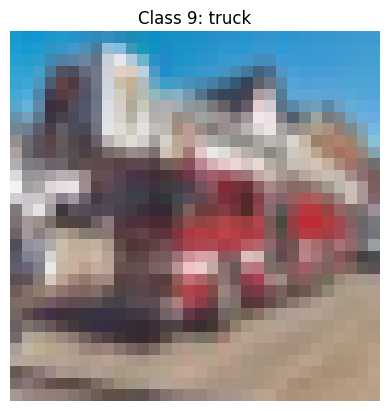

In [219]:
train_data, val_data = get_CIFAR10(size=0.25)

transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = CIFAR10Dataset(train_data, transform=transform)
val_dataset = CIFAR10Dataset(val_data, transform=transform)

visualize_data(train_dataset)

In [211]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

iterator = iter(train_loader)
batch = next(iterator)

print(f"Batch of images: {batch[0].shape}; Batch of labels: {batch[1].shape}")

Batch of images: torch.Size([64, 3, 32, 32]); Batch of labels: torch.Size([64])


In [220]:
from tqdm import tqdm
device = torch.device('mps')

model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

epoch_pbar = tqdm(range(num_epochs), desc="Training Progress")
for epoch in epoch_pbar:
    model.train()
    running_loss_train = running_loss_val = 0.0
    correct_train = total_train = 0
    correct_val = total_val = 0

    for inputs_train, labels_train in train_loader:
        inputs_train, labels_train = inputs_train.to(device), labels_train.to(device)
        
        outputs_train = model(inputs_train)
        loss_train = criterion(outputs_train, labels_train)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        running_loss_train += loss_train.item()
        
        _, predicted_train = torch.max(outputs_train, 1)
        total_train += len(labels_train)
        correct_train += (predicted_train == labels_train).sum().item()
            
    train_losses.append(running_loss_train / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)
    
    with torch.no_grad():
        model.eval()
        for inputs_val, labels_val in val_loader:
            inputs_val, labels_val = inputs_val.to(device), labels_val.to(device)

            outputs_val = model(inputs_val)
            loss_val = criterion(outputs_val, labels_val)
            
            running_loss_val += loss_val.item()
    
            _, predicted_val = torch.max(outputs_val, 1)
            total_val += len(labels_val)
            correct_val += (predicted_val == labels_val).sum().item()

    val_losses.append(running_loss_val / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)


Training Progress:   4%|▍         | 4/100 [00:07<02:52,  1.79s/it]

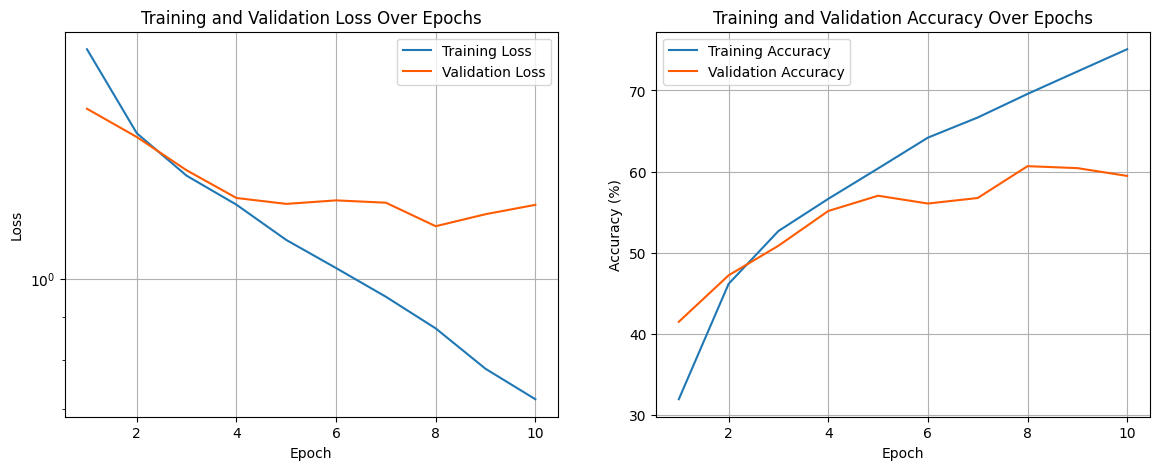

In [217]:
epochs = list(range(1, num_epochs + 1))

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].plot(epochs, train_losses, label='Training Loss')
axs[0].plot(epochs, val_losses, color='#FF5B00', label='Validation Loss')
axs[0].set_title('Training and Validation Loss Over Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_yscale('log')

axs[1].plot(epochs, train_accuracies, label='Training Accuracy')
axs[1].plot(epochs, val_accuracies, color='#FF5B00', label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy Over Epochs')
axs[1].set_ylabel('Accuracy (%)')

for ax in axs:
    ax.set_xlabel('Epoch')
    ax.legend()
    ax.grid()

plt.show()